In [28]:
import numpy as np

In [29]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    y = x1*w1 + x2*w2

    if y <= theta:
        return 0
    else:
        return 1

In [30]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))


(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


# bias

In [32]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1


In [33]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [34]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7

    y = np.sum(w*x) + b
    if y <=0:
        return 0
    else:
        return 1

In [35]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = NAND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [36]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2

    y = np.sum(w*x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [37]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = OR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


# XOR 게이트 구현

In [38]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

In [39]:
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


# 시그모이드 함수 구현

In [40]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [41]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [42]:
def ReLU(x):
    return np.maximum(0,x)
def ReLU(x):
    mask = (x<=0)
    out = x.copy()
    out[mask] = 0
    
    return out

x = np.array([2,1,-1])
ReLU(x)

array([2, 1, 0])

# MLP 구현

In [43]:
import numpy as np

def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5 ],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x):
    W1,W2,W3 = network['W1'], network['W2'], network['W3']
    b1,b2,b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    
    y = a3
    
    return y
    
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# Softmax 구현

In [44]:
np.exp([0.2,0.3])

array([1.22140276, 1.34985881])

In [8]:
def softmax1(x):
    return np.exp(x)/sum(np.exp(x))
X = np.array([[1, 2], [3, 4]])
softmax1(X)

In [9]:
X = np.array([[1, 2], [3, 4]])


array([[1, 2],
       [3, 4]])

In [10]:
softmax(X)

array([[0.11920292, 0.11920292],
       [0.88079708, 0.88079708]])

In [9]:
import numpy as np
def softmax1(x):
    return np.sum(x,)
X = np.array([[1, 2], [3, 4]])
Y = np.array([1,2])
softmax1(X)


array([3, 7])

In [8]:
def softmax2(x):
    return np.sum(x)
X = np.array([[1, 2], [3, 4]])
Y = np.array([1,2])
softmax2(X)


10

In [37]:
def softmax3(x):
    return np.exp(x)/sum(np.exp(x))
X = np.array([[1, 2], [3, 4]])
Y = np.array([1,2])
softmax3(X)

AxisError: axis 1 is out of bounds for array of dimension 1

In [34]:
def softmax4(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference
X = np.array([[1, 2], [3, 4]])
softmax4(X)
softmax4(Y)

array([0.26894142, 0.73105858])

In [35]:
def softmax5(x):
    exp_x = np.exp(x)
    sum_exp_x = sum(exp_x).reshape(-1, 1)
    y = exp_x/sum_exp_x
    return y
X = np.array([[1, 2], [3, 4]])
softmax5(X)
softmax5(Y)

array([[0.26894142, 0.73105858]])

In [12]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [13]:
softmax(X)

array([[0.0320586 , 0.08714432],
       [0.23688282, 0.64391426]])

In [2]:
print(softmax([2, 1, 0]))

[0.66524096 0.24472847 0.09003057]


# MNIST 예측

In [55]:


def load_mnist(normalize=True, flatten=True, one_hot_label=False):
    def _change_one_hot_label(X):
        T = np.zeros((X.size, 10))
        for idx, row in enumerate(T):
            row[X[idx]] = 1

        return T

    with open('./dataset/mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
        
    if normalize:
        for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].astype(np.float32)
            dataset[key] /= 255.0
            
    if one_hot_label:
        dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
        dataset['test_label'] = _change_one_hot_label(dataset['test_label'])    
    
    if not flatten:
         for key in ('train_img', 'test_img'):
            dataset[key] = dataset[key].reshape(-1, 1, 28, 28)

    return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label']) 


In [56]:
import numpy as np
import pickle
#from dataset.mnist import load_mnist


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)



In [57]:
x_train.shape

(60000, 784)

In [58]:
x_train[0].shape

(784,)

In [59]:
t_train[0]

5

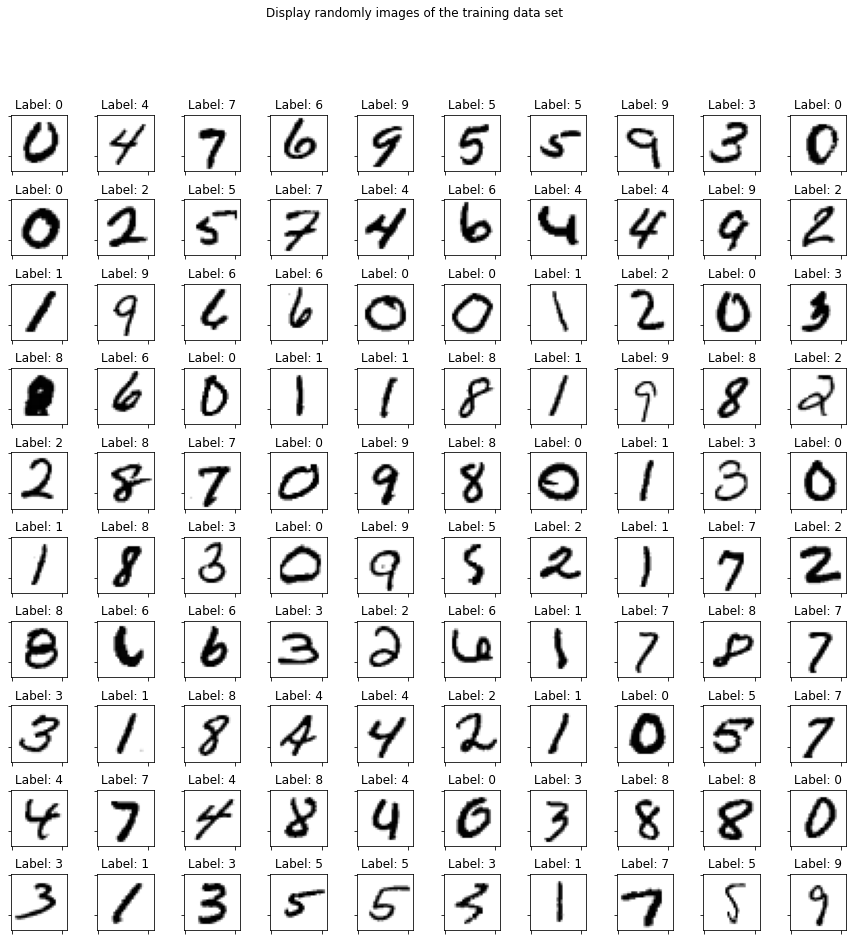

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
    fig.suptitle('Display randomly images of the training data set')

    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind, :].reshape(28, 28)
            ax[i, j].set_title("Label: {}".format(Y[ind]))
            ax[i, j].imshow(tmp, cmap='gray_r')
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
            
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x_train,t_train)  

In [61]:

def init_network():
    with open("./dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)

    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


model = init_network()


In [62]:
# 개수의 의미 파악
print('W1',model['W1'].shape)
print('b1',model['b1'].shape)
print('W2',model['W2'].shape)
print('b2',model['b2'].shape)
print('W3',model['W3'].shape)
print('b3',model['b3'].shape)

W1 (784, 50)
b1 (50,)
W2 (50, 100)
b2 (100,)
W3 (100, 10)
b3 (10,)


In [63]:
x_test.shape

(10000, 784)

In [64]:
%%time
accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(model, x_test[i])
    if i == 0:
        print(y)
        print(t_test[i])
    p = np.argmax(y)
    if p == t_test[i]:
        accuracy_cnt +=1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))


[8.4412619e-05 2.6350660e-06 7.1549485e-04 1.2586275e-03 1.1727965e-06
 4.4990877e-05 1.6269331e-08 9.9706495e-01 9.3744866e-06 8.1831217e-04]
7
Accuracy:0.9352
CPU times: user 3.96 s, sys: 230 ms, total: 4.19 s
Wall time: 662 ms


# batch

In [65]:
x_batch = x_train[0:batch_size]
x_batch.shape

NameError: name 'batch_size' is not defined

In [67]:
%%time
network = init_network()
accuracy_cnt = 0
batch_size = 100
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    t_batch = predict(network, x_batch)
    #print(t_batch.shape)
    
    p = np.argmax(t_batch, axis=1)
    accuracy_cnt += np.sum(p == t_test[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9207
CPU times: user 293 ms, sys: 43.8 ms, total: 336 ms
Wall time: 62.1 ms


In [68]:
X = np.array([[1, 2], [3, 4]])
X

array([[1, 2],
       [3, 4]])

In [69]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

In [70]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [71]:
s = 0
for i in range(len(X)):
    temp_s = sigmoid(X[i])
    print(temp_s)
                     
    s += temp_s
s

[0.73105858 0.88079708]
[0.95257413 0.98201379]


array([1.68363271, 1.86281087])

In [72]:
sigmoid(X)

array([[0.73105858, 0.88079708],
       [0.95257413, 0.98201379]])